<a href="https://colab.research.google.com/github/BishalDali/Principal-component-analysis/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Generating Dataframe
df = pd.DataFrame(np.random.randint(1,100,size=(100, 3)), columns=list('XYZ'))
print(df.head(5))
df.shape

    X   Y   Z
0  87  13  84
1   9  64  33
2  76  42  53
3  55   4  76
4  87  82  14


(100, 3)

The table generated by the code is a pandas DataFrame with 100 rows and 3 columns. The columns are labeled as 'X', 'Y', and 'Z'. Each column contains 100 randomly generated integer values between 1 and 100, inclusive.

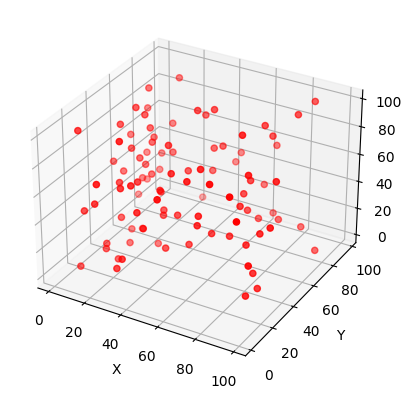

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['X'], df['Y'], df['Z'], c='r', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()



(100,)
(100,)
(100,)


### Covariance Matrix

$$ \text{Cov}(X,Y) = \frac{\sum_{i=1}^n (X_i - \mu_X) \cdot (Y_i - \mu_Y)}{n-1} $$

where $\text{Cov}(X,Y)$ represents the sample covariance between variables $X$ and $Y$, $\mu_X$ and $\mu_Y$ represent the sample means of $X$ and $Y$ respectively, $n$ represents the number of observations, and $X_i$ and $Y_i$ represent the $i$th observation of $X$ and $Y$ respectively.

The covariance matrix is a square matrix where each element $(i,j)$ represents the sample covariance between the  $i_{th}$ and $j_{th}$  variables in the dataset. The diagonal elements of the covariance matrix represent the variance of each variable.

In [ ]:
def covariance_matrix(df):
    n = df.shape[0]
    p = df.shape[1]
    cov_matrix = np.zeros((p,p))
    
    for i in range(p):
        for j in range(p):
            mean_i = np.mean(df.iloc[:,i])
            mean_j = np.mean(df.iloc[:,j])
            cov_ij = np.sum((df.iloc[:,i] - mean_i) * (df.iloc[:,j] - mean_j)) / (n - 1)
            cov_matrix[i,j] = cov_ij
    
    return cov_matrix


cov_matrix = covariance_matrix(df)
cov_matrix

array([[884.07787879, -61.21646465,  34.1740404 ],
       [-61.21646465, 665.53727273,  29.19606061],
       [ 34.1740404 ,  29.19606061, 762.03020202]])

In [ ]:

covariance_matrix_using_np = np.cov(df.T)
covariance_matrix_using_np

array([[884.07787879, -61.21646465,  34.1740404 ],
       [-61.21646465, 665.53727273,  29.19606061],
       [ 34.1740404 ,  29.19606061, 762.03020202]])

We can also check the covariance matrix using the numpy's function cov() to make sure we have correct value

### Eigenvalues and Eigenvectors

The formula for the eigenvalues of a square matrix $A$ is:

$$ \text{det}(A - \lambda I) = 0 $$

where $\text{det}(A - \lambda I)$ represents the determinant of the matrix $A - \lambda I$, $\lambda$ represents the eigenvalue of $A$, and $I$ represents the identity matrix.

In this formula, $\lambda$ is a scalar value that satisfies the equation, and is known as an eigenvalue of $A$. The eigenvalues of $A$ are the roots of the characteristic equation $\text{det}(A - \lambda I) = 0$.


In [ ]:
def eigen(cov):
    # Get the dimensions of the input matrix
    n = cov.shape[0]

    # Initialize the eigenvectors to the identity matrix
    eigvecs = np.identity(n)

    # Set an error tolerance for the eigenvalue convergence
    eps = 1e-8

    # Initialize the eigenvalues to a large value
    eigvals = np.ones(n)

    # Iterate until the eigenvalues converge
    while True:
        # Store the old eigenvalues
        old_eigvals = eigvals.copy()

        # Calculate the new eigenvalues and eigenvectors
        for i in range(n):
            # Calculate the diagonal element of the matrix cov - lambda*I
            d = cov[i, i] - eigvals[i]

            # If d is very small or zero, set the corresponding eigenvalue to zero or a small value
            if np.abs(d) < eps:
                eigvals[i] = 0.0
            else:
                # Calculate the off-diagonal elements of the matrix cov - lambda*I
                s = 0
                for j in range(n):
                    if j != i:
                        s += cov[i, j] * eigvecs[j, i]

                # Calculate the new eigenvalue and eigenvector
                eigvals[i] = cov[i, i] - s / d
                eigvecs[:, i] = eigvecs[:, i] / np.linalg.norm(eigvecs[:, i])

        # Check for eigenvalue convergence
        if np.max(np.abs(eigvals - old_eigvals)) < eps:
            break

    return eigvals, eigvecs


In [ ]:
eigenValue, eigenVector = eigen(cov_matrix)

In [ ]:
eigenValue, eigenVector = np.linalg.eig(cov_matrix)
eigenValue, eigenVector


(array([904.85778827, 638.33302975, 768.45453552]),
 array([[ 0.95748296, -0.26916903, -0.1037999 ],
        [-0.22251776, -0.91806127,  0.3280996 ],
        [ 0.18360892,  0.29105246,  0.93892291]]))

In [ ]:
# Sort the eigenvectors based on their corresponding eigenvalues
idx = eigenValue.argsort()[::-1]
eigenValue = eigenValue[idx]
eigenVector = eigenVector[:, idx]


In [ ]:
#Compute the Principal Components
principalComponents = np.dot(df, eigenVector)
principalComponents = pd.DataFrame(principalComponents)
principalComponents.head(5)

,0,1,2
0,95.831436,74.104228,-10.904096
1,0.435305,51.048632,-51.573712
2,73.154232,55.654305,-43.589640
3,65.725770,66.961545,3.643445
4,67.625086,31.018497,-94.623996


In [ ]:

explained_variance = (eigenValue / np.sum(eigenValue)) * 100
print(explained_variance)




[39.14345195 33.24275215 27.6137959 ]


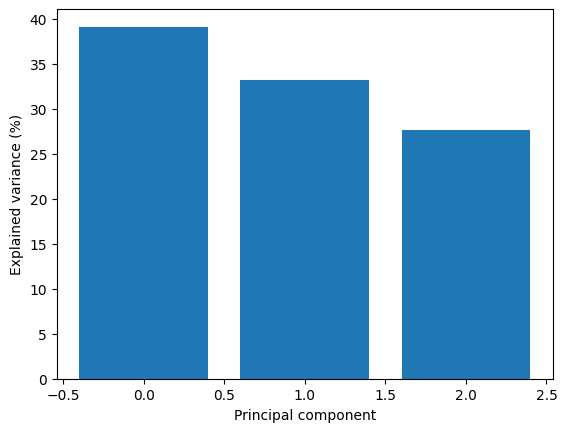

In [ ]:

plt.bar(range(len(explained_variance)), explained_variance)
plt.xlabel('Principal component')
plt.ylabel('Explained variance (%)')
plt.show()